In [21]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [22]:
preprocessed_data = pd.read_csv('data_processed.csv')

In [23]:
preprocessed_data.shape
preprocessed_data.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,...,titles_word_count,essays_word_count,project_year_month,preprocessed_titles,preprocessed_essays,preprocessed_res_summary,essay_words_bins,prev_proj_bins,quantity_bins,price_bins
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,0,154.6,...,7,272,16-12,educational support for english learners at home,students english learners working english seco...,students need opportunities practice beginning...,"(270, 280]","(-1, 4]","(20, 25]","(150, 160]"


# Splitting data into X & Y

In [24]:
y = preprocessed_data['project_is_approved'].values
x = preprocessed_data.drop(['project_is_approved'], axis=1)
x.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,price,quantity,titles_word_count,essays_word_count,project_year_month,preprocessed_titles,preprocessed_essays,preprocessed_res_summary,essay_words_bins,prev_proj_bins,quantity_bins,price_bins
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,154.6,23,7,272,16-12,educational support for english learners at home,students english learners working english seco...,students need opportunities practice beginning...,"(270, 280]","(-1, 4]","(20, 25]","(150, 160]"


# Splitting data into Train & Test data

In [25]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, stratify=y)
print(y_tr.size)
print(y_te.size)
print(x_tr.shape)
print(x_te.shape)

87398
21850
(87398, 20)
(21850, 20)


# Featurization of Essay, Project_title, Project Summary using BoW

In [26]:
def bow(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_bow = vectorizer.transform(x_train)
    x_test_bow = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [27]:
#Essays featurization
vectorizer = CountVectorizer(min_df=15,ngram_range=(1,2))
(x_tr_essay_bow, x_te_essay_bow) = bow (vectorizer, x_tr['preprocessed_essays'].values, x_te['preprocessed_essays'].values)
print("x_train essays matrix dimensions", x_tr_essay_bow.shape)
print("x_test essays matrix dimensions", x_te_essay_bow.shape)

#Titles featurization
vectorizer = CountVectorizer()
(x_tr_title_bow, x_te_title_bow) = bow (vectorizer, x_tr['preprocessed_titles'].values, x_te['preprocessed_titles'].values)

print("x_train titles matrix dimensions", x_tr_title_bow.shape)
print("x_test titles matrix dimensions", x_te_title_bow.shape)

#Resource Summaries
vectorizer = CountVectorizer()
(x_tr_res_summary_bow, x_te_res_summary_bow) = bow (vectorizer, x_tr['preprocessed_res_summary'].values, x_te['preprocessed_res_summary'].values)

print("x_test titles matrix dimensions", x_tr_res_summary_bow.shape)
print("x_test titles matrix dimensions", x_te_res_summary_bow.shape)

x_train essays matrix dimensions (87398, 109823)
x_test essays matrix dimensions (21850, 109823)
x_train titles matrix dimensions (87398, 15197)
x_test titles matrix dimensions (21850, 15197)
x_test titles matrix dimensions (87398, 20128)
x_test titles matrix dimensions (21850, 20128)



# Featurization of Essays, Project Titles, Resource Summary using tf-idf

In [28]:
def tfidf(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_bow = vectorizer.transform(x_train)
    x_test_bow = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [29]:
#Essays featurization
vectorizer = TfidfVectorizer(min_df=15,ngram_range=(1,2))
(x_tr_essay_tfidf, x_te_essay_tfidf) = bow (vectorizer, x_tr['preprocessed_essays'].values, x_te['preprocessed_essays'].values)
print("x_train essays matrix dimensions", x_tr_essay_tfidf.shape)
print("x_test essays matrix dimensions", x_te_essay_tfidf.shape)

#Titles featurization
vectorizer = CountVectorizer()
(x_tr_title_tfidf, x_te_title_tfidf) = bow (vectorizer, x_tr['preprocessed_titles'].values, x_te['preprocessed_titles'].values)

print("x_train titles matrix dimensions", x_tr_title_tfidf.shape)
print("x_test titles matrix dimensions", x_te_title_tfidf.shape)

#Resource Summaries
vectorizer = CountVectorizer()
(x_tr_res_summary_tfidf, x_te_res_summary_tfidf) = bow (vectorizer, x_tr['preprocessed_res_summary'].values, x_te['preprocessed_res_summary'].values)

print("x_test titles matrix dimensions", x_tr_res_summary_tfidf.shape)
print("x_test titles matrix dimensions", x_te_res_summary_tfidf.shape)

x_train essays matrix dimensions (87398, 109823)
x_test essays matrix dimensions (21850, 109823)
x_train titles matrix dimensions (87398, 15197)
x_test titles matrix dimensions (21850, 15197)
x_test titles matrix dimensions (87398, 20128)
x_test titles matrix dimensions (21850, 20128)


# Featurization of Categorical features


In [30]:
def ohe(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_ohe = vectorizer.transform(x_train)
    x_test_ohe = vectorizer.transform(x_test)
    return (x_train_ohe, x_test_ohe)

In [31]:
vectorizer = CountVectorizer()

# Project_subject_categories
(x_tr_subjects_ohe, x_te_subjects_ohe) = ohe (vectorizer, x_tr['project_subject_categories'].values, x_te['project_subject_categories'].values)

# Project_subject_subcategories
(x_tr_subject_subcat_ohe, x_te_subject_subcat_ohe) = ohe (vectorizer, x_tr['project_subject_subcategories'].values, x_te['project_subject_subcategories'].values)


# Teacher_prefixs
(x_tr_teacher_prefix_ohe, x_te_teacher_prefix_ohe) = ohe (vectorizer, x_tr['teacher_prefix'].values, x_te['teacher_prefix'].values)

# Teachers
(x_tr_teacher_ohe, x_te_teacher_ohe) = ohe (vectorizer, x_tr['teacher_id'].values, x_te['teacher_id'].values)

# School state codes
(x_tr_school_state_ohe, x_te_school_state_ohe) = ohe (vectorizer, x_tr['school_state'].values, x_te['school_state'].values)

# Project grade categories
(x_tr_grade_ohe, x_te_grade_ohe) = ohe (vectorizer, x_tr['project_grade_category'].values, x_te['project_grade_category'].values)

# Prev_projects_bins
(x_tr_prev_projects, x_te_prev_projects) = ohe (vectorizer, x_tr['prev_proj_bins'].values, x_te['prev_proj_bins'].values)

# quantity_bins
(x_tr_quantity, x_te_quantity) = ohe (vectorizer, x_tr['quantity_bins'].values, x_te['quantity_bins'].values)

#title_word_count
x_tr_title_word_count=x_tr['titles_word_count'].values.reshape(-1,1)
x_te_title_word_count=x_te['titles_word_count'].values.reshape(-1,1)

# NB Stacking of vectors (with BoW Featurized text features)

In [33]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((x_tr_essay_bow, x_tr_title_bow, x_tr_res_summary_bow, x_tr_subjects_ohe, x_tr_subject_subcat_ohe, x_tr_school_state_ohe, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe, x_tr_grade_ohe, x_tr_title_word_count, x_tr_quantity, x_tr_prev_projects)).tocsr()
X_te_bow = hstack((x_te_essay_bow, x_te_title_bow, x_te_res_summary_bow, x_te_subjects_ohe, x_te_subject_subcat_ohe, x_te_school_state_ohe, x_te_teacher_ohe, x_te_teacher_prefix_ohe, x_te_grade_ohe, x_te_title_word_count, x_te_quantity, x_te_prev_projects)).tocsr()
#, x_tr_quantity, x_tr_prev_projects, x_tr_essay_words_count, 
#x_te_price, x_te_quantity, x_te_prev_projects, x_te_essay_words_count, 
print("Final Data matrix")
print(X_tr_bow.shape, y_tr.shape)
print(X_te_bow.shape, y_te.shape)

Final Data matrix
(87398, 206196) (87398,)
(21850, 206196) (21850,)


# Naive Bayes (with BoW Featurized text features)

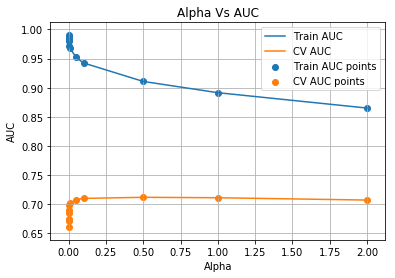

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.405701,0.017041,0.035909,0.011227,1e-05,{'alpha': 1e-05},0.651572,0.657060,0.667576,0.665689,...,0.661018,0.005906,12,0.989667,0.990544,0.989904,0.990081,0.990295,0.990098,0.000304
1,0.445929,0.030155,0.046912,0.011150,5e-05,{'alpha': 5e-05},0.660077,0.668775,0.677737,0.674695,...,0.670795,0.006099,11,0.987245,0.988231,0.987478,0.987710,0.987891,0.987711,0.000339
2,0.432028,0.016132,0.039897,0.009431,0.0001,{'alpha': 0.0001},0.664965,0.673807,0.681217,0.678541,...,0.675305,0.005689,10,0.985891,0.986906,0.986138,0.986384,0.986532,0.986370,0.000345
3,0.465163,0.063315,0.043238,0.008301,0.0005,{'alpha': 0.0005},0.675196,0.684486,0.690939,0.687738,...,0.685373,0.005491,9,0.981700,0.982874,0.981971,0.982225,0.982357,0.982225,0.000395
4,0.546763,0.062001,0.055657,0.016174,0.001,{'alpha': 0.001},0.679194,0.690422,0.695657,0.690858,...,0.689939,0.005699,8,0.979260,0.980510,0.979560,0.979834,0.979970,0.979827,0.000420
5,0.569866,0.027644,0.046278,0.006811,0.005,{'alpha': 0.005},0.685869,0.699995,0.703910,0.698821,...,0.698403,0.006562,7,0.971449,0.972892,0.971712,0.972086,0.972225,0.972073,0.000493
6,0.561066,0.024197,0.060438,0.007894,0.01,{'alpha': 0.01},0.689351,0.703342,0.707249,0.702051,...,0.701771,0.006522,6,0.966755,0.968315,0.967031,0.967394,0.967582,0.967416,0.000533
7,0.603966,0.050312,0.064958,0.003268,0.05,{'alpha': 0.05},0.695911,0.710222,0.713418,0.707056,...,0.708072,0.006548,4,0.951178,0.953009,0.951373,0.951818,0.952055,0.951886,0.000641
8,0.562970,0.019229,0.051663,0.007203,0.1,{'alpha': 0.1},0.697373,0.712740,0.715185,0.709034,...,0.710008,0.006743,3,0.941622,0.943611,0.941754,0.942318,0.942545,0.942370,0.000709
9,0.578209,0.023749,0.055561,0.010957,0.5,{'alpha': 0.5},0.700084,0.715282,0.716636,0.709602,...,0.711908,0.006560,1,0.909869,0.912192,0.909729,0.910732,0.910917,0.910688,0.000884


In [34]:
nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2]}
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_bow, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alp =  results['param_alpha']

plt.plot(alp, train_auc, label='Train AUC')
plt.plot(alp, cv_auc, label='CV AUC')
plt.scatter(alp, train_auc, label='Train AUC points')
plt.scatter(alp, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("Alpha Vs AUC")
plt.grid()
plt.show()
results

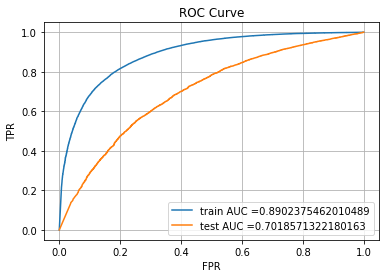

In [35]:
from sklearn.metrics import roc_curve, auc

nb = MultinomialNB(alpha=0.5,class_prior=[0.5,0.5])
nb.fit(X_tr_bow, y_tr)

y_tr_pred = nb.predict_proba(X_tr_bow)[:,1]
y_te_pred = nb.predict_proba(X_te_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [36]:
def best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("best threshold:", t)
    print(50*"=")
    return t

def prediction(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [38]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.6595656227639076
Test Accuracy Score
0.7308924485125858
Test F1 Score
0.8290797046683331


# Naive Bayes (with tf-idf Featurizated text features)

# NB Stacking of vectors (with tf-idf Featurized text features)

In [39]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((x_tr_essay_tfidf, x_tr_title_tfidf, x_tr_res_summary_tfidf, x_tr_subjects_ohe, x_tr_subject_subcat_ohe, x_tr_school_state_ohe, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe, x_tr_grade_ohe, x_tr_quantity, x_tr_prev_projects, x_tr_title_word_count)).tocsr()
X_te_tfidf = hstack((x_te_essay_tfidf, x_te_title_tfidf, x_te_res_summary_tfidf, x_te_subjects_ohe, x_te_subject_subcat_ohe, x_te_school_state_ohe, x_te_teacher_ohe, x_te_teacher_prefix_ohe, x_te_grade_ohe, x_te_quantity, x_te_prev_projects, x_te_title_word_count)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_tr.shape)
print(X_te_tfidf.shape, y_te.shape)

Final Data matrix
(87398, 206196) (87398,)
(21850, 206196) (21850,)


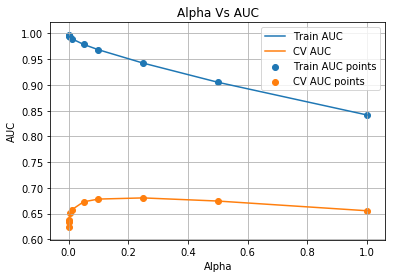

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.398209,0.018459,0.037437,0.008155,0.0001,{'alpha': 0.0001},0.612369,0.619182,0.626855,0.633158,...,0.624137,0.007438,10,0.996726,0.996686,0.996628,0.996684,0.996727,0.996690,0.000036
1,0.410542,0.027789,0.035390,0.005614,0.0005,{'alpha': 0.0005},0.621150,0.628685,0.635896,0.640927,...,0.632941,0.007152,9,0.995780,0.995774,0.995704,0.995756,0.995860,0.995775,0.000050
2,0.387538,0.018024,0.032843,0.003051,0.001,{'alpha': 0.001},0.625872,0.633720,0.640765,0.645050,...,0.637646,0.007006,8,0.995076,0.995091,0.995012,0.995063,0.995211,0.995091,0.000066
3,0.440117,0.023294,0.041454,0.009067,0.005,{'alpha': 0.005},0.639257,0.647678,0.654357,0.656528,...,0.650814,0.006606,7,0.992099,0.992190,0.992068,0.992114,0.992433,0.992181,0.000132
4,0.495608,0.029621,0.047672,0.010544,0.01,{'alpha': 0.01},0.645960,0.654520,0.661109,0.662123,...,0.657350,0.006434,5,0.989788,0.989930,0.989777,0.989824,0.990252,0.989914,0.000177
5,0.454906,0.007549,0.038498,0.007152,0.05,{'alpha': 0.05},0.661926,0.670754,0.677151,0.675204,...,0.672976,0.006271,4,0.978498,0.978773,0.978434,0.978541,0.979460,0.978741,0.000377
6,0.506417,0.039731,0.051553,0.007733,0.1,{'alpha': 0.1},0.667412,0.676313,0.682350,0.679550,...,0.678314,0.006307,2,0.968019,0.968357,0.967829,0.968060,0.969273,0.968308,0.000511
7,0.516810,0.019716,0.048699,0.009688,0.25,{'alpha': 0.25},0.670019,0.678722,0.683752,0.681167,...,0.680561,0.006306,1,0.942051,0.942388,0.941479,0.942180,0.943613,0.942342,0.000703
8,0.512740,0.007430,0.050279,0.008729,0.5,{'alpha': 0.5},0.664118,0.672499,0.676875,0.675520,...,0.674475,0.006277,3,0.905064,0.905208,0.904069,0.905352,0.906345,0.905208,0.000726
9,0.523009,0.019165,0.047489,0.010028,1,{'alpha': 1},0.645627,0.652952,0.657451,0.658728,...,0.655606,0.005976,6,0.842253,0.841689,0.840434,0.842160,0.841719,0.841651,0.000649


In [40]:
nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.25,0.5,1]}
clf = GridSearchCV(nb, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alp =  results['param_alpha']

plt.plot(alp, train_auc, label='Train AUC')
plt.plot(alp, cv_auc, label='CV AUC')
plt.scatter(alp, train_auc, label='Train AUC points')
plt.scatter(alp, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("Alpha Vs AUC")
plt.grid()
plt.show()

results

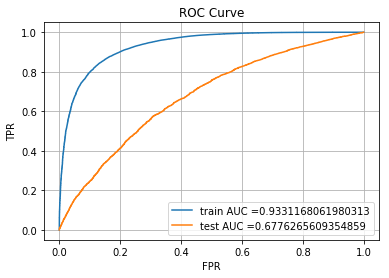

In [41]:
from sklearn.metrics import roc_curve, auc

nb = MultinomialNB(alpha=0.25, class_prior=[0.5,0.5])
nb.fit(X_tr_tfidf, y_tr)

y_tr_pred = nb.predict_proba(X_tr_tfidf)[:,1]
y_te_pred = nb.predict_proba(X_te_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [42]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.4458364280592904
Test Accuracy Score
0.7602288329519451
Test F1 Score
0.8535651396148364


# Standardization - Price, Quantity, Previous Projects, Word_counts

In [43]:
def stan(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train_stan = scaler.transform(x_train)
    x_test_stan = scaler.transform(x_test)
    return (x_train_stan, x_test_stan)

In [44]:
#Project Price
(x_tr_price_stan, x_te_price_stan) = stan(x_tr['price'].values.reshape(-1,1), x_te['price'].values.reshape(-1,1))

#Resource Quantities
(x_tr_quantity_stan, x_te_quantity_stan) = stan(x_tr['quantity'].values.reshape(-1,1), x_te['quantity'].values.reshape(-1,1))

#Previously posted projects by a teacher
(x_tr_prev_projects_stan, x_te_prev_projects_stan) = stan(x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1), x_te['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

#No. of Words in a title
(x_tr_title_word_count_stan, x_te_title_word_count_stan) = stan(x_tr['titles_word_count'].values.reshape(-1,1), x_te['titles_word_count'].values.reshape(-1,1))

#No. of Words in an essay
(x_tr_essay_word_count_stan, x_te_essay_word_count_stan) = stan(x_tr['essays_word_count'].values.reshape(-1,1), x_te['essays_word_count'].values.reshape(-1,1))

# Logistic Regression (with BoW Featurized text features)

# Stacking

In [45]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((x_tr_essay_bow, x_tr_title_bow, x_tr_res_summary_bow, x_tr_subjects_ohe, x_tr_subject_subcat_ohe, x_tr_school_state_ohe, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe, x_tr_grade_ohe, x_tr_price_stan, x_tr_quantity_stan, x_tr_prev_projects_stan, x_tr_essay_word_count_stan, x_tr_title_word_count_stan)).tocsr()
X_te_bow = hstack((x_te_essay_bow, x_te_title_bow, x_te_res_summary_bow, x_te_subjects_ohe, x_te_subject_subcat_ohe, x_te_school_state_ohe, x_te_teacher_ohe, x_te_teacher_prefix_ohe, x_te_grade_ohe, x_te_price_stan, x_te_quantity_stan, x_te_prev_projects_stan, x_te_essay_word_count_stan, x_te_title_word_count_stan)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_tr.shape)
print(X_te_bow.shape, y_te.shape)

Final Data matrix
(87398, 206000) (87398,)
(21850, 206000) (21850,)


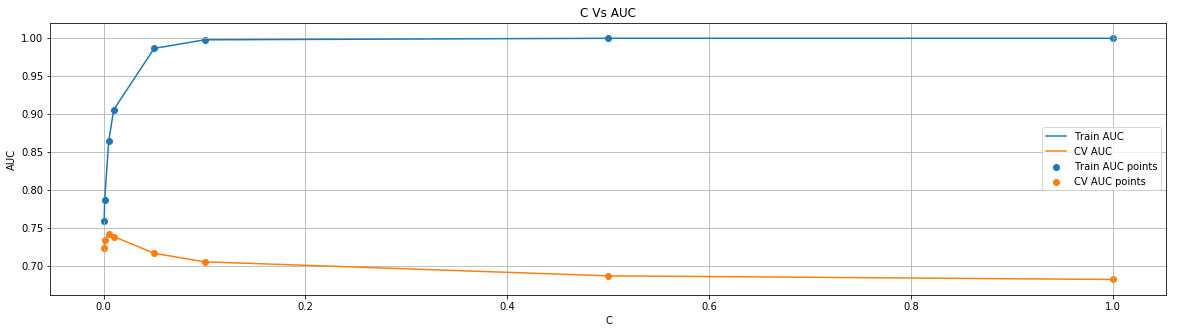

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.539928,0.168186,0.020745,0.003636,0.0005,{'C': 0.0005},0.716986,0.726051,0.729269,0.719508,...,0.723839,0.004747,4,0.760745,0.759381,0.758539,0.759657,0.758588,0.759382,8.092207e-04
1,5.836568,0.442084,0.020251,0.002748,0.001,{'C': 0.001},0.727709,0.735886,0.739422,0.730557,...,0.734285,0.004446,3,0.787867,0.786943,0.786261,0.787007,0.786146,0.786845,6.177930e-04
2,10.236153,1.495614,0.024097,0.003572,0.005,{'C': 0.005},0.737473,0.742435,0.745477,0.739228,...,0.742000,0.003223,1,0.864862,0.864321,0.864442,0.864549,0.863718,0.864378,3.760327e-04
3,13.230933,2.040469,0.021476,0.004162,0.01,{'C': 0.01},0.734512,0.738761,0.740832,0.735722,...,0.738394,0.002910,2,0.906225,0.905925,0.906182,0.906024,0.905245,0.905920,3.542080e-04
4,21.538566,1.793754,0.018937,0.003093,0.05,{'C': 0.05},0.712853,0.716951,0.717007,0.713788,...,0.716411,0.003022,5,0.986771,0.986849,0.986678,0.986385,0.986246,0.986586,2.313957e-04
5,35.785327,8.246974,0.022335,0.005634,0.1,{'C': 0.1},0.701304,0.705969,0.705178,0.702782,...,0.705141,0.003144,6,0.998040,0.998019,0.997977,0.997970,0.997892,0.997980,5.100883e-05
6,66.316744,3.634903,0.023337,0.003373,0.5,{'C': 0.5},0.681765,0.688622,0.685948,0.685017,...,0.686678,0.003462,7,0.999997,0.999995,0.999996,0.999998,0.999997,0.999997,7.747891e-07
7,77.082751,11.113708,0.020944,0.004803,1,{'C': 1},0.676484,0.684214,0.680967,0.680479,...,0.681847,0.003591,8,0.999999,0.999999,0.999999,1.000000,0.999999,0.999999,6.293546e-08


In [46]:
lr = LogisticRegression()
parameters = {'C':[0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]}
clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_bow, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
C =  results['param_C']

plt.figure(figsize=(20,5))
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("C Vs AUC")
plt.grid()
plt.show()
results

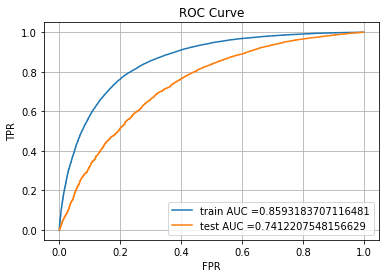

In [49]:
lr = LogisticRegression(C=0.005)
lr.fit(X_tr_bow, y_tr)

y_tr_pred = lr.predict_proba(X_tr_bow)[:,1]
y_te_pred = lr.predict_proba(X_te_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [50]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.8198163284239728
Test Accuracy Score
0.7350572082379863
Test F1 Score
0.8292884314824098


# Logistic Regression (with tf-idf Featurized text features)

# Stacking

In [47]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((x_tr_essay_tfidf, x_tr_title_tfidf, x_tr_res_summary_tfidf, x_tr_subjects_ohe, x_tr_subject_subcat_ohe, x_tr_school_state_ohe, x_tr_teacher_ohe, x_tr_teacher_prefix_ohe, x_tr_grade_ohe, x_tr_price_stan, x_tr_quantity_stan, x_tr_prev_projects_stan, x_tr_essay_word_count_stan, x_tr_title_word_count_stan)).tocsr()
X_te_tfidf = hstack((x_te_essay_tfidf, x_te_title_tfidf, x_te_res_summary_tfidf, x_te_subjects_ohe, x_te_subject_subcat_ohe, x_te_school_state_ohe, x_te_teacher_ohe, x_te_teacher_prefix_ohe, x_te_grade_ohe, x_te_price_stan, x_te_quantity_stan, x_te_prev_projects_stan, x_te_essay_word_count_stan, x_te_title_word_count_stan)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_tr.shape)
print(X_te_tfidf.shape, y_te.shape)

Final Data matrix
(87398, 206000) (87398,)
(21850, 206000) (21850,)


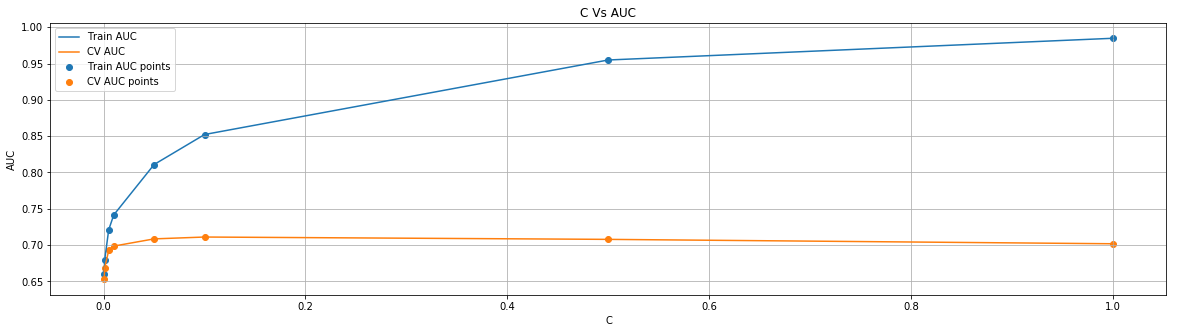

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.798933,0.230342,0.020347,0.002932,0.0005,{'C': 0.0005},0.642166,0.652435,0.652058,0.657900,...,0.652691,0.005947,8,0.662642,0.659495,0.660122,0.658593,0.657927,0.659756,0.001627
1,3.628767,0.519942,0.022341,0.005733,0.001,{'C': 0.001},0.657664,0.669060,0.668028,0.673532,...,0.668904,0.006361,7,0.682484,0.679327,0.679937,0.678671,0.677805,0.679645,0.001586
2,6.516016,0.748421,0.020372,0.004598,0.005,{'C': 0.005},0.680188,0.694611,0.693533,0.694167,...,0.692625,0.006720,6,0.723677,0.720843,0.720659,0.721042,0.719675,0.721179,0.001334
3,8.046290,0.934391,0.022164,0.003384,0.01,{'C': 0.01},0.685409,0.701226,0.700286,0.699726,...,0.698653,0.007062,5,0.743897,0.741345,0.740737,0.741630,0.740334,0.741588,0.001240
4,13.819154,1.242147,0.019754,0.002781,0.05,{'C': 0.05},0.694161,0.711652,0.712172,0.709782,...,0.708586,0.007417,2,0.812279,0.811058,0.809634,0.811184,0.810710,0.810973,0.000851


In [48]:
lr = LogisticRegression()
parameters = {'C':[0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]}
clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
C =  results['param_C']

plt.figure(figsize=(20,5))
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("C Vs AUC")
plt.grid()
plt.show()
results.head()

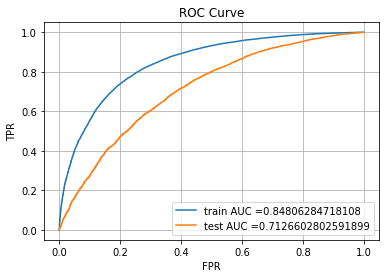

In [51]:
lr = LogisticRegression(C=0.1)
lr.fit(X_tr_tfidf, y_tr)

y_tr_pred = lr.predict_proba(X_tr_tfidf)[:,1]
y_te_pred = lr.predict_proba(X_te_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [52]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.8297401145140916
Test Accuracy Score
0.7143249427917621
Test F1 Score
0.814568356009744
